In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import ast
import joblib

In [15]:
first_base = pd.read_csv('atbats_total.csv')

first_base

,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_past,Success_past_third,Success_past_second,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Date
0,0,Josh Donaldson,1,1,0.033333,0.500000,0.033333,1,1,2,3,True,False,1,"{'init': 0, 476704: 1}",2014-04-07
1,1,Josh Donaldson,1,1,0.033333,0.500000,0.033333,0,3,6,7,True,False,0,"{'init': 0, 476704: 1}",2014-04-07
2,2,Jed Lowrie,0,0,0.300000,0.666667,0.300000,3,3,5,4,True,True,1,"{'init': 0, 519083: 1}",2014-04-07
3,3,Josh Donaldson,1,0,0.033333,0.500000,0.033333,2,3,8,9,True,True,1,"{'init': 0, 346857: 1}",2014-04-07
4,4,Starling Marte,0,0,0.266667,0.500000,0.266667,2,7,3,8,True,True,1,"{'init': 0, 467798: 1}",2014-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369780,369780,Ramón Laureano,0,0,0.266667,0.566667,0.266667,2,7,8,9,False,True,1,"{'init': 0, 642201: 1}",2024-09-30
369781,369781,Francisco Lindor,1,1,0.266667,0.666667,0.266667,1,7,8,9,True,False,1,"{'init': 0, 516782: 1}",2024-09-30
369782,369782,Matt Olson,0,0,0.233333,0.566667,0.233333,3,0,0,1,False,True,1,"{'init': 0, 542303: 1}",2024-09-30
369783,369783,Sean Murphy,0,0,0.200000,0.366667,0.200000,1,1,0,2,False,False,1,"{'init': 0, 570482: 1}",2024-09-30


In [16]:
list(ast.literal_eval(first_base['dict_players'].tolist()[0]).keys())

['init', 476704]

In [17]:
first_base['runner_id'] = first_base['dict_players'].apply(lambda x: list(ast.literal_eval(x).keys())[-1])

In [18]:
first_base.head()

,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_past,Success_past_third,Success_past_second,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Date,runner_id
0,0,Josh Donaldson,1,1,0.033333,0.500000,0.033333,1,1,2,3,True,False,1,"{'init': 0, 476704: 1}",2014-04-07,476704
1,1,Josh Donaldson,1,1,0.033333,0.500000,0.033333,0,3,6,7,True,False,0,"{'init': 0, 476704: 1}",2014-04-07,476704
2,2,Jed Lowrie,0,0,0.300000,0.666667,0.300000,3,3,5,4,True,True,1,"{'init': 0, 519083: 1}",2014-04-07,519083
3,3,Josh Donaldson,1,0,0.033333,0.500000,0.033333,2,3,8,9,True,True,1,"{'init': 0, 346857: 1}",2014-04-07,346857
4,4,Starling Marte,0,0,0.266667,0.500000,0.266667,2,7,3,8,True,True,1,"{'init': 0, 467798: 1}",2014-04-09,467798


In [19]:
first_base

,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_past,Success_past_third,Success_past_second,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Date,runner_id
0,0,Josh Donaldson,1,1,0.033333,0.500000,0.033333,1,1,2,3,True,False,1,"{'init': 0, 476704: 1}",2014-04-07,476704
1,1,Josh Donaldson,1,1,0.033333,0.500000,0.033333,0,3,6,7,True,False,0,"{'init': 0, 476704: 1}",2014-04-07,476704
2,2,Jed Lowrie,0,0,0.300000,0.666667,0.300000,3,3,5,4,True,True,1,"{'init': 0, 519083: 1}",2014-04-07,519083
3,3,Josh Donaldson,1,0,0.033333,0.500000,0.033333,2,3,8,9,True,True,1,"{'init': 0, 346857: 1}",2014-04-07,346857
4,4,Starling Marte,0,0,0.266667,0.500000,0.266667,2,7,3,8,True,True,1,"{'init': 0, 467798: 1}",2014-04-09,467798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369780,369780,Ramón Laureano,0,0,0.266667,0.566667,0.266667,2,7,8,9,False,True,1,"{'init': 0, 642201: 1}",2024-09-30,642201
369781,369781,Francisco Lindor,1,1,0.266667,0.666667,0.266667,1,7,8,9,True,False,1,"{'init': 0, 516782: 1}",2024-09-30,516782
369782,369782,Matt Olson,0,0,0.233333,0.566667,0.233333,3,0,0,1,False,True,1,"{'init': 0, 542303: 1}",2024-09-30,542303
369783,369783,Sean Murphy,0,0,0.200000,0.366667,0.200000,1,1,0,2,False,False,1,"{'init': 0, 570482: 1}",2024-09-30,570482


In [20]:
stolen_df = pd.read_csv('stolen_df_2.csv')
stolen_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Arm_Strength_3,Sprint_3,Result_4,Exchange_4,Arm_Strength_4,Sprint_4,Result_5,Exchange_5,Arm_Strength_5,Sprint_5
0,1,0.74,84.9,28.0,2021-04-01,545341,Randal Grichuk,1,0.74,84.9,...,84.9,27.0,0,0.74,84.9,27.7,0,0.74,84.9,25.0
1,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
2,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
3,0,0.73,79.0,27.9,2020-09-30,666185,Dylan Carlson,0,0.73,79.0,...,79.0,27.6,1,0.73,79.0,27.6,0,0.73,79.0,28.6
4,1,0.7,83.2,27.8,2020-09-30,502054,Tommy Pham,1,0.70,83.2,...,83.2,NaN,1,0.70,83.2,NaN,1,0.70,83.2,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37567,1,0.65,82.7,27.6,2016-04-09,500871,Eduardo Escobar,1,0.65,82.7,...,82.7,25.2,0,0.65,82.7,NaN,1,0.65,82.7,NaN
37568,1,0.75,80.1,28.4,2016-04-09,514888,Jose Altuve,1,0.75,80.1,...,80.1,26.3,1,0.75,80.1,27.9,0,0.75,80.1,26.3
37569,1,0.75,80.1,28.0,2016-04-09,543807,George Springer,1,0.75,80.1,...,80.1,26.3,1,0.75,80.1,27.9,0,0.75,80.1,26.3
37570,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN


In [21]:
first_base = first_base.loc[first_base['Date'] > '2022-09-30']

In [22]:
stolen_df.sort_values(by='Date')

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Arm_Strength_3,Sprint_3,Result_4,Exchange_4,Arm_Strength_4,Sprint_4,Result_5,Exchange_5,Arm_Strength_5,Sprint_5
37571,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
32330,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
26536,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
32329,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN
37570,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26541,1,0.78,84.6,26.6,2023-09-30,666971,Lourdes Gurriel Jr.,1,0.69,85.4,...,85.4,NaN,1,0.69,85.4,NaN,1,0.69,85.4,29.6
26540,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,83.5,29.3,1,0.62,83.5,28.5,0,0.62,83.5,27.7
26539,1,0.69,78.8,29.3,2023-09-30,686668,Brenton Doyle,1,0.60,79.5,...,79.5,29.6,1,0.60,79.5,27.1,0,0.60,79.5,29.2
26537,1,0.72,83.7,29.4,2023-09-30,665923,Esteury Ruiz,1,0.72,83.7,...,83.7,NaN,1,0.72,83.7,28.1,1,0.72,83.7,27.2


In [23]:
data_exp = {
    "Runners": ['0', "1", "2", "1,2", "3", "1,3", "2,3", "1,2,3"],
    "0 Outs": [0.461, 0.831, 1.068, 1.373, 1.426, 1.798, 1.920, 2.282],
    "1 Outs": [0.243, 0.489, 0.644, 0.908, 0.865, 1.140, 1.352, 1.520],
    "2 Outs": [0.095, 0.214, 0.305, 0.343, 0.413, 0.471, 0.570, 0.736],
}


exp_run_base = pd.DataFrame(data_exp)
exp_run_base

,Runners,0 Outs,1 Outs,2 Outs
0,0,0.461,0.243,0.095
1,1,0.831,0.489,0.214
2,2,1.068,0.644,0.305
3,"1,2",1.373,0.908,0.343
4,3,1.426,0.865,0.413
5,"1,3",1.798,1.140,0.471
6,"2,3",1.920,1.352,0.570
7,"1,2,3",2.282,1.520,0.736


In [24]:
stolen_subset = stolen_df[['Result', 'Date', 'runner_id']]

final_df = pd.merge(stolen_df, first_base, on=['Date', 'runner_id'], how='inner')

final_df.replace(' --', 0, inplace=True)

In [25]:

final_df['Rbi_steal_unique'] = final_df.apply(lambda x: 1 if x['Rbi_outcome'] == 1 and x['Rbi_stay'] == 0 else 0, axis=1)
final_df.sort_values(by='Date')

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Success_past_second,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Rbi_steal_unique
11119,1,0.73,82.2,28.4,2023-04-01,691023,Jordan Walker,0,0.70,80.8,...,0.166667,3,0,0,2,False,True,1,"{'init': 0, 691023: 1}",0
11093,0,0.69,79.3,29.9,2023-04-01,622761,Jorge Mateo,1,0.67,79.1,...,0.200000,0,0,3,2,True,False,0,"{'init': 0, 622761: 1}",0
11092,0,0.69,79.3,29.9,2023-04-01,622761,Jorge Mateo,1,0.67,79.1,...,0.200000,0,0,3,2,True,False,0,"{'init': 0, 622761: 1}",0
11091,1,0.7,80.3,28.0,2023-04-01,607043,Brandon Nimmo,1,0.70,80.3,...,0.266667,2,2,4,6,True,True,1,"{'init': 0, 607043: 1}",0
11090,1,0.7,80.3,28.0,2023-04-01,607043,Brandon Nimmo,1,0.70,80.3,...,0.266667,1,0,0,1,True,True,1,"{'init': 0, 607043: 1}",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,1,0.71,87.4,26.5,2023-09-30,664901,Danny Mendick,1,0.65,85.1,...,0.266667,1,4,0,7,False,True,1,"{'init': 0, 664901: 1}",0
54,1,0.71,87.4,26.5,2023-09-30,664901,Danny Mendick,1,0.65,85.1,...,0.333333,2,4,0,7,False,True,1,"{'init': 0, 664901: 1}",0
55,1,0.71,87.4,26.5,2023-09-30,664901,Danny Mendick,1,0.65,85.1,...,0.266667,1,4,0,7,False,True,1,"{'init': 0, 664901: 1}",0
48,0,0.67,83.1,30.5,2023-09-30,677951,Bobby Witt Jr.,1,0.61,76.4,...,0.233333,1,2,5,7,False,True,1,"{'init': 0, 677951: 1}",1


In [26]:
X_scaler = joblib.load('gradient_scale.pkl')

nn_model = joblib.load('gradient.pkl')

In [27]:
final_df.dropna(inplace=True)

In [28]:
X = final_df[['Exchange', 'Arm_Strength', 'Sprint', 'Result_1', 'Exchange_1',
       'Arm_Strength_1', 'Sprint_1', 'Result_2', 'Exchange_2',
       'Arm_Strength_2', 'Sprint_2', 'Result_3', 'Exchange_3',
       'Arm_Strength_3', 'Sprint_3', 'Result_4', 'Exchange_4',
       'Arm_Strength_4', 'Sprint_4', 'Result_5', 'Exchange_5',
       'Arm_Strength_5', 'Sprint_5']]



X_scaled = X_scaler.transform(X)

predictions = nn_model.predict(X_scaled)

final_df['Past_Steal_Success'] = predictions

In [29]:


final_df['Simulated_out'] = final_df['Current_outs'] + 1

In [30]:
def utility_steal(x):
    
    if x["Current_outs"] in [0, 1]:
        
        utils = x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Out'].tolist()[0])
                                                                
    else:
        utils = x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Outs'].tolist()[0])
          
    return utils
                                                                
def utility_caught(x):
    
    if x["Simulated_out"] in [1, 2]:
        
        utils = (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])
                                                                
    else:
        utils = (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]) 
          
    return utils
                                                 
def utility_stay(x):
    
    if x["Current_outs"] in [0, 1]:
        
        utils = (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])

                                                                
    else:
        utils = (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])
          
    return utils

In [33]:
final_df['Diff'] = final_df.apply(lambda x: x['awayScore'] - x['homeScore'] if x['isTopInning'] == 1 else x['homeScore'] - x['awayScore'], axis=1)


final_df['Diff_transform'] = final_df['Diff'].apply(lambda x: np.exp(-(x**2) / (2 * (1.5)**2)))

final_df['Utility_steal'] = final_df.apply(lambda x: x['Past_Steal_Success'] * x['Success_past_third'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)

final_df['Utility_caught'] = final_df.apply(lambda x: (1 - x['Past_Steal_Success']) * (0 - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]) if x["Simulated_out"] == 3 else (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)

final_df['Utility_stay'] = final_df.apply(lambda x: (x['Success_past_second']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)


In [34]:
final_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Current_outs,dict_players,Rbi_steal_unique,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay
2,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,1,"{'init': 0, 663656: 1}",0,1,2,1,0.800737,0.634333,-0.000,0.150267
3,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,1,"{'init': 0, 663656: 1}",0,1,2,1,0.800737,0.634333,-0.000,0.150267
76,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,1,"{'init': 0, 607054: 1}",0,1,2,-2,0.411112,0.490167,-0.000,0.193200
77,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,1,"{'init': 0, 607054: 1}",1,1,2,-2,0.411112,0.346000,-0.000,0.085867
78,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,1,"{'init': 0, 607054: 1}",1,1,2,0,1.000000,0.346000,-0.000,0.085867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,1,0.72,74.5,25.2,2023-04-01,664774,LaMonte Wade Jr.,1,0.65,76.8,...,1,"{'init': 0, 664774: 1}",0,1,2,0,1.000000,0.519000,-0.000,0.128800
11108,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,1,"{'init': 0, 683011: 1}",0,0,2,-3,0.135335,0.000000,-0.549,0.171733
11109,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,1,"{'init': 0, 683011: 1}",0,0,2,1,0.800737,0.000000,-0.549,0.171733
11110,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,1,"{'init': 0, 683011: 1}",0,0,2,-3,0.135335,0.000000,-0.549,0.171733


In [35]:
final_df.dropna(inplace=True)
final_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Current_outs,dict_players,Rbi_steal_unique,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay
2,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,1,"{'init': 0, 663656: 1}",0,1,2,1,0.800737,0.634333,-0.000,0.150267
3,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,1,"{'init': 0, 663656: 1}",0,1,2,1,0.800737,0.634333,-0.000,0.150267
76,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,1,"{'init': 0, 607054: 1}",0,1,2,-2,0.411112,0.490167,-0.000,0.193200
77,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,1,"{'init': 0, 607054: 1}",1,1,2,-2,0.411112,0.346000,-0.000,0.085867
78,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,1,"{'init': 0, 607054: 1}",1,1,2,0,1.000000,0.346000,-0.000,0.085867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,1,0.72,74.5,25.2,2023-04-01,664774,LaMonte Wade Jr.,1,0.65,76.8,...,1,"{'init': 0, 664774: 1}",0,1,2,0,1.000000,0.519000,-0.000,0.128800
11108,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,1,"{'init': 0, 683011: 1}",0,0,2,-3,0.135335,0.000000,-0.549,0.171733
11109,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,1,"{'init': 0, 683011: 1}",0,0,2,1,0.800737,0.000000,-0.549,0.171733
11110,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,1,"{'init': 0, 683011: 1}",0,0,2,-3,0.135335,0.000000,-0.549,0.171733


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

final_df['Diff_transform'] = final_df['Diff'].apply(lambda x: np.exp(-(x**2) / (2 * (1.5)**2)))



In [37]:
final_df['Expected_Utils'] = final_df['Utility_steal'] * final_df['Diff_transform'] * np.exp(-final_df['Current_outs']) + final_df['Utility_caught'] * np.exp(final_df['Current_outs']) * final_df['inning'] - final_df['Utility_stay'] * np.exp(-final_df['Current_outs'])




In [38]:
final_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,dict_players,Rbi_steal_unique,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay,Expected_Utils
2,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,"{'init': 0, 663656: 1}",0,1,2,1,0.800737,0.634333,-0.000,0.150267,0.131579
3,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,"{'init': 0, 663656: 1}",0,1,2,1,0.800737,0.634333,-0.000,0.150267,0.131579
76,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,"{'init': 0, 607054: 1}",0,1,2,-2,0.411112,0.490167,-0.000,0.193200,0.003058
77,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,"{'init': 0, 607054: 1}",1,1,2,-2,0.411112,0.346000,-0.000,0.085867,0.020740
78,1,0.78,84.6,27.5,2023-09-29,607054,Jace Peterson,1,0.69,85.4,...,"{'init': 0, 607054: 1}",1,1,2,0,1.000000,0.346000,-0.000,0.085867,0.095698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,1,0.72,74.5,25.2,2023-04-01,664774,LaMonte Wade Jr.,1,0.65,76.8,...,"{'init': 0, 664774: 1}",0,1,2,0,1.000000,0.519000,-0.000,0.128800,0.143547
11108,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,"{'init': 0, 683011: 1}",0,0,2,-3,0.135335,0.000000,-0.549,0.171733,-13.494208
11109,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,"{'init': 0, 683011: 1}",0,0,2,1,0.800737,0.000000,-0.549,0.171733,-3.047851
11110,0,0.72,79.9,28.6,2023-04-01,683011,Anthony Volpe,1,0.68,74.5,...,"{'init': 0, 683011: 1}",0,0,2,-3,0.135335,0.000000,-0.549,0.171733,-13.494208


In [39]:
final_df = final_df.sort_values(by='Expected_Utils')
final_df = final_df.reset_index()

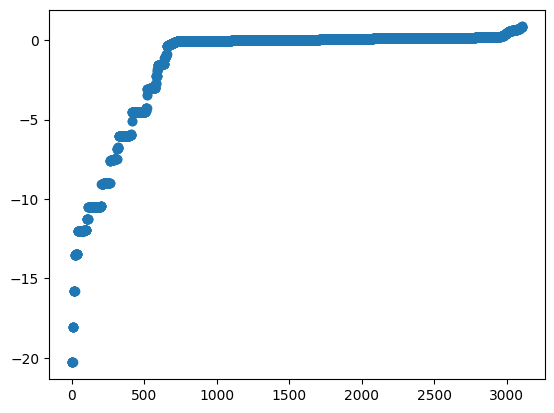

In [40]:
plt.scatter(x=final_df.index, y=final_df['Expected_Utils'])

In [41]:
# Above -1 util threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] > -1])
rbi_outcomes = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_stay'].sum()
past_success_steal_prob = final_df.loc[final_df['Expected_Utils'] > -1]['Past_Steal_Success'].mean()

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal

With percentage of rbis gained per steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 2458 with rbi outcomes - 846 and prob of success of steal- 0.9975589910496339 means that there is an  expected rbi return of 843.9349064279902 this means you can expect a gain of 383.9349064279902 RBis by choosing steal

With percentage of rbis gained per steal - 0.3433421100195241


In [42]:
# Less than -1 threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] < -1])

rbi_outcomes = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_stay'].sum()
past_success_steal_prob = final_df.loc[final_df['Expected_Utils'] < -1]['Past_Steal_Success'].mean()

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal or by choosing to stay gain {rbi_outcomes_stay} rbis

With percentage of rbis gained per steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 650 with rbi outcomes - 214 and prob of success of steal- 0.0 means that there is an  expected rbi return of 0.0 this means you can expect a gain of -126.0 RBis by choosing steal or by choosing to stay gain 126 rbis

With percentage of rbis gained per steal - 0.0


In [43]:
# accuracy out of sample 

true_acc = 0.94

In [44]:
# Above -1 util threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] > -1])
rbi_outcomes = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_stay'].sum()
past_success_steal_prob = true_acc

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal

With percentage of rbis gained per attempted steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 2458 with rbi outcomes - 846 and prob of success of steal- 0.94 means that there is an  expected rbi return of 795.24 this means you can expect a gain of 335.24 RBis by choosing steal

With percentage of rbis gained per attempted steal - 0.3235313262815297


In [45]:
# Less than -1 threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] < -1])

rbi_outcomes = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_stay'].sum()
past_success_steal_prob = true_acc

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal or by choosing to stay gain {rbi_outcomes_stay} rbis

With percentage of rbis gained per attempted steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 650 with rbi outcomes - 214 and prob of success of steal- 0.94 means that there is an  expected rbi return of 201.16 this means you can expect a gain of 75.16 RBis by choosing steal or by choosing to stay gain 126 rbis

With percentage of rbis gained per attempted steal - 0.3094769230769231
